#19/07/2022

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import pandas as pd

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 29.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d1530ad105d6075db63d60d804e5f1c3c79644e1cbbcb98cbf0ec9b3f7641775
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import mglearn

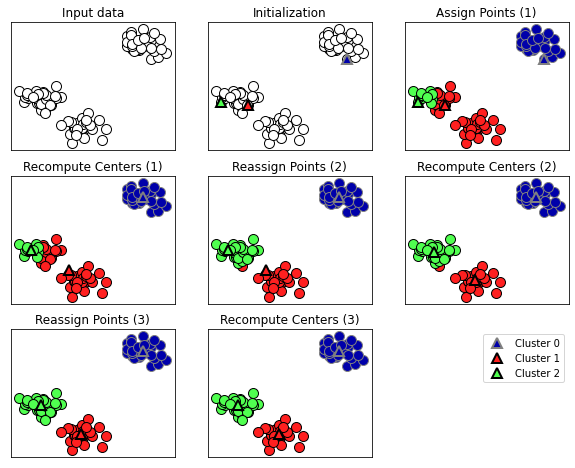

In [4]:
mglearn.plots.plot_kmeans_algorithm()

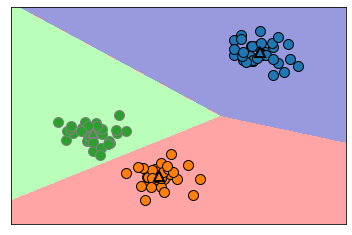

In [5]:
mglearn.plots.plot_kmeans_boundaries()

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
n_clusters=3
x, y=make_blobs(centers=n_clusters, random_state=1)
kmeans=KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, tol=0.0001)
kmeans.fit(x)

KMeans(n_clusters=3)

In [8]:
print(kmeans.predict(x))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


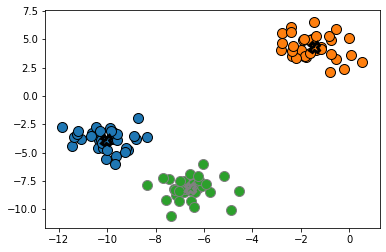

In [12]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], range(n_clusters), markers='X', markeredgewidth=3)

In [17]:
depdata=pd.read_csv('Depression.csv')
depdata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [20]:
depdata=depdata.drop('id', axis=1)

In [21]:
depdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [22]:
depdata.describe()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,1.000000,1.000000,1.000001,1.000000,1.000000,1.000000
std,0.500000,0.500001,0.500000,0.499999,0.500000,0.500000
min,0.250680,-0.058370,0.469530,0.235690,0.030120,0.234540
25%,0.656282,0.563010,0.566410,0.697958,0.731598,0.596565
50%,0.882665,0.977270,0.824750,0.968490,0.924290,0.967845
75%,1.269400,1.391520,1.373730,1.201790,1.299120,1.261750
max,2.854080,2.220030,2.245650,2.949770,2.249310,2.787630


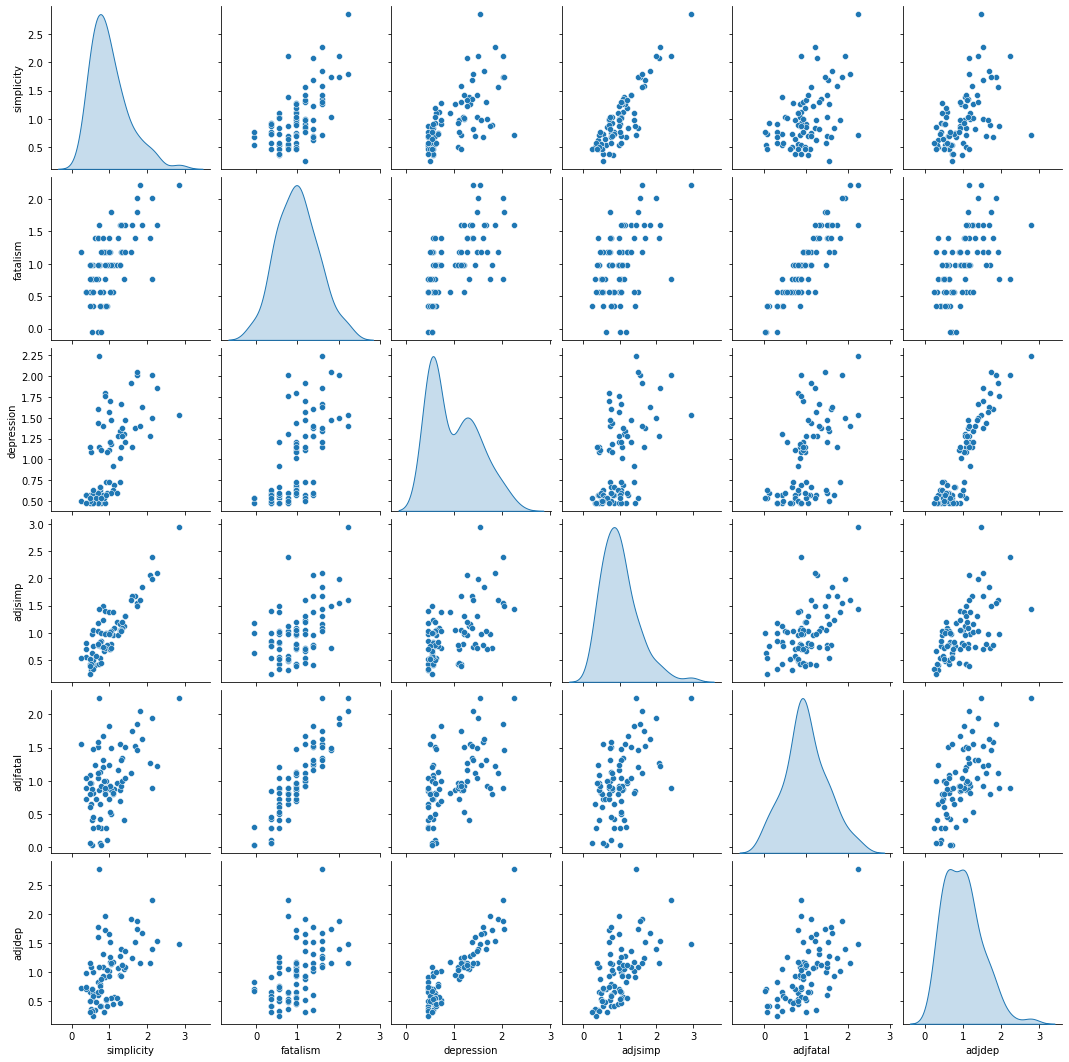

In [25]:
import seaborn as sns
sns.pairplot(depdata, diag_kind='kde')

In [26]:
depdata=depdata.drop(['adjsimp', 'adjfatal', 'adjdep'], axis=1)
depdata.head()

,simplicity,fatalism,depression
0,0.92983,0.35589,0.59870
1,0.91097,1.18439,0.72787
2,0.53366,-0.05837,0.53411
3,0.74118,0.35589,0.56641
4,0.53366,0.77014,0.50182


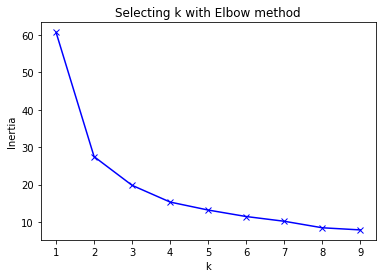

In [29]:
clusters=range(1, 10)
inertias=[]
for k in clusters:
  model=KMeans(n_clusters=k, random_state=2, n_init=10, max_iter=300, tol=0.0001)
  model.fit(depdata)
  inertias.append(model.inertia_)
plt.plot(clusters, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Selecting k with Elbow method')
plt.show()

In [42]:
kmeans=KMeans(n_clusters=3, random_state=2, n_init=10, max_iter=300, tol=0.0001)
kmeans.fit(depdata)

KMeans(n_clusters=3, random_state=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 0.92, '3d plt of K-means Clustering')

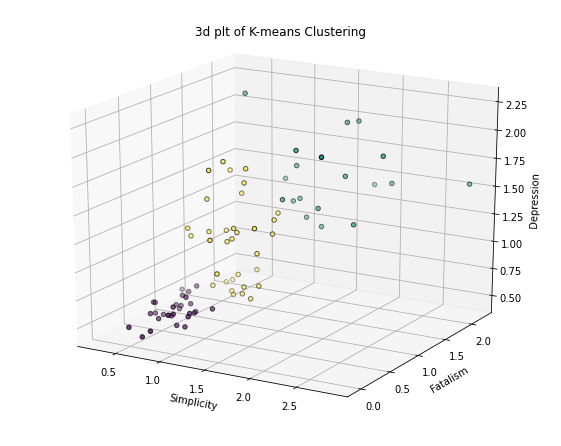

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8, 6))
ax=Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-60)
kmeans.fit(depdata)
labels=kmeans.labels_
ax.scatter(depdata.iloc[:, 0], depdata.iloc[:, 1], depdata.iloc[:, 2], c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Simplicity')
ax.set_ylabel('Fatalism')
ax.set_zlabel('Depression')
ax.set_title('3d plt of K-means Clustering')

In [44]:
kmeans=KMeans(n_clusters=2, random_state=2, n_init=10, max_iter=300, tol=0.0001)
kmeans.fit(depdata)

KMeans(n_clusters=2, random_state=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 0.92, '3d plt of K-means Clustering')

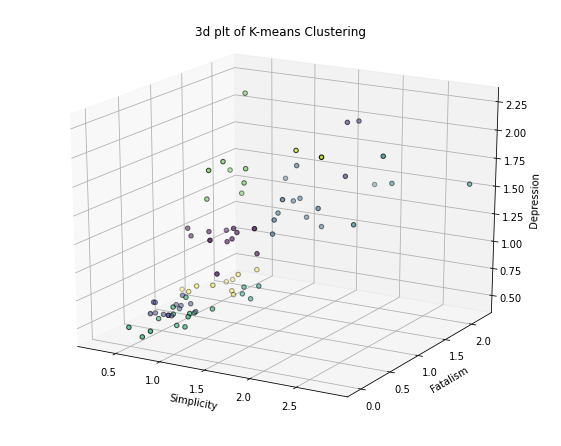

In [110]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8, 6))
ax=Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-60)
kmeans.fit(depdata)
labels=kmeans.labels_
ax.scatter(depdata.iloc[:, 0], depdata.iloc[:, 1], depdata.iloc[:, 2], c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Simplicity')
ax.set_ylabel('Fatalism')
ax.set_zlabel('Depression')
ax.set_title('3d plt of K-means Clustering')

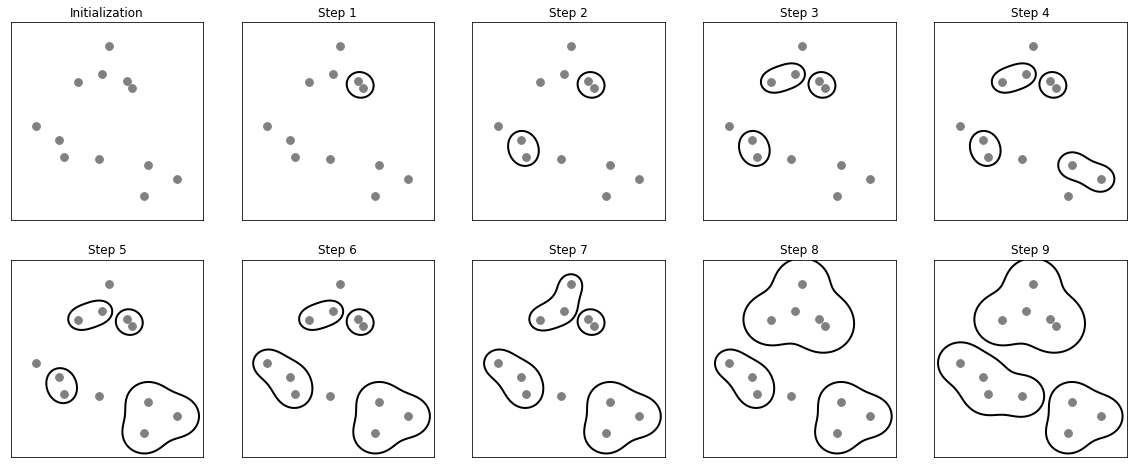

In [46]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

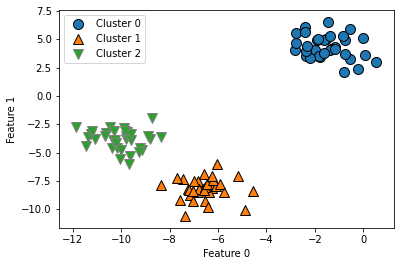

In [47]:
from sklearn.cluster import AgglomerativeClustering
x, y=make_blobs(random_state=1)
agg=AgglomerativeClustering(n_clusters=3, affinity='euclidean', compute_full_tree=0, linkage='ward')
pred=agg.fit_predict(x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], pred)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Cluster Distance')

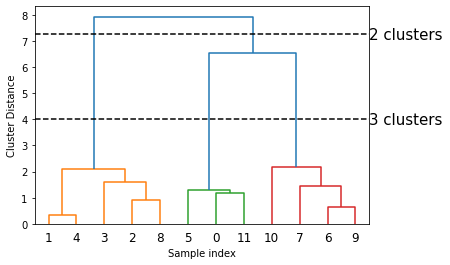

In [54]:
from scipy.cluster.hierarchy import dendrogram, ward
x, y=make_blobs(random_state=0, n_samples=12)
linkage_array=ward(x)
dendrogram(linkage_array)
ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, '2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, '3 clusters', va='center', fontdict={'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Cluster Distance')

In [55]:
df=pd.read_csv('vehicle.csv').dropna()
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_z=scaler.fit_transform(df.drop('class', axis=1))

In [58]:
agg=AgglomerativeClustering(n_clusters=3, affinity='euclidean', compute_full_tree=0, linkage='ward')
pred=agg.fit_predict(df_z)
print(pred)

[1 1 0 1 0 1 1 1 1 1 1 1 1 0 2 0 0 1 2 1 1 0 1 2 0 0 2 1 1 1 0 1 2 0 0 2 0
 2 1 1 0 1 1 2 1 1 2 1 0 1 0 1 0 1 0 2 0 2 2 2 0 2 0 1 0 0 1 2 1 0 1 2 1 0
 1 2 1 0 1 2 0 2 0 1 0 1 2 0 2 2 0 2 0 1 1 1 0 0 1 2 0 1 1 2 2 1 1 0 0 1 2
 1 1 1 1 1 2 1 1 0 0 1 1 2 0 0 1 1 2 1 1 0 2 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1
 2 0 1 1 0 0 1 0 2 2 0 0 1 0 1 1 1 1 2 0 2 1 2 0 0 1 1 0 1 1 1 0 1 2 0 2 2
 2 1 1 0 0 1 1 1 2 0 1 1 1 0 1 2 0 1 1 0 1 2 2 1 0 1 0 2 2 2 2 0 1 1 1 0 2
 1 1 2 0 1 2 1 1 0 2 0 1 1 1 0 1 1 0 0 2 1 1 1 0 2 1 1 2 2 0 1 0 1 2 2 0 1
 0 2 2 0 1 1 0 2 1 0 1 1 0 1 0 2 1 1 0 1 1 1 2 1 0 0 0 1 1 1 0 2 2 1 0 2 0
 0 2 0 1 2 1 1 1 1 0 0 2 0 0 1 0 1 1 1 2 2 0 0 0 1 1 1 0 2 1 2 1 0 1 0 1 0
 0 0 1 1 2 0 1 2 2 1 0 1 1 2 0 0 2 2 0 2 0 2 0 1 1 0 1 0 0 2 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 2 1 1 1 1 2 2 1 1 0 1 1 2 2 0 1 2 0 1 0 1 0 1 0 0 2 2 0 1 2
 2 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 2 2 1 0 0 1 0 1 2 1 2 2 0 1 1 0 0 0 2
 0 0 1 0 2 0 0 1 1 1 2 0 1 2 0 0 1 2 0 0 1 1 2 0 0 0 2 2 0 0 0 1 1 0 2 1 0
 1 1 2 1 0 2 1 1 1 0 0 1 

In [60]:
df_z.shape

(813, 18)

Text(0, 0.5, 'Cluster distance')

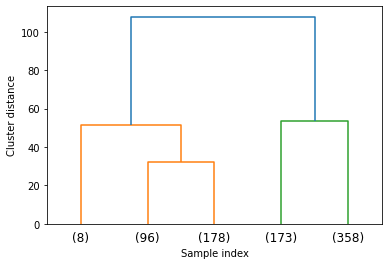

In [62]:
linkage_array=ward(df_z)
dendrogram(linkage_array, truncate_mode='lastp', p=5)
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

In [83]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits=load_digits()
digits_df=pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [85]:
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [86]:
digits_df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

In [87]:
digits_df.describe

<bound method NDFrame.describe of       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  

In [98]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
X, y=load_digits(return_X_y=True)
(n_samples, n_features), n_digits=digits_df.shape, np.unique(y).size
print(n_samples, n_features, n_digits)

1797 64 10


In [120]:
kmeans=KMeans(n_clusters=n_digits, n_init=10, max_iter=300, tol=0.0001)
kmeans.fit(X)
print(kmeans.predict(X))

[1 7 7 ... 7 4 4]


In [107]:
from sklearn.decomposition import PCA
dim_r=PCA(n_components=2)
X_new=dim_r.fit_transform(X)